In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [5]:
data = np.loadtxt('data.dat')

n = len(data)

indice = np.arange(n)
Even = (indice%2) ==0
print(Even)

[ True False  True ... False  True False]


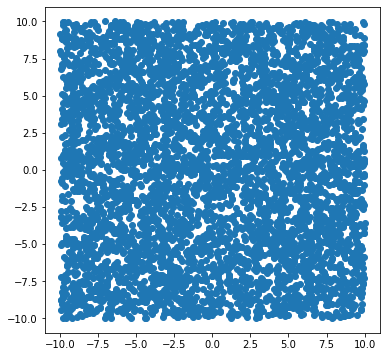

In [7]:
fig = plt.figure(figsize = (6,6))
plt.scatter(data[Even], data[~Even])

In [44]:
class MyRandom():
    
    def __init__(self, seed = 15 , method = 'simple'):
        
        self.r = seed
        self.method = method
        
        if method == 'simple':
            self.a = 57 
            self.c = 1
            self.M = 265
        elif method == "drand48":
            self.a = int('5DEECE66D',16) 
            self.c = int('B', 16)
            self.M = 2 **48
        else:
            print('Generador no reconocido')
    
    def Random(self):
        
        r= (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32 , method_ = 'simple'):
        
        rand = MyRandom(seed = seed_ , method = method_)
        
        array = np.zeros(Npoints)
        
        for i in range(Npoints):
            
            array[i] = rand.Random()
        
        return np.sqrt(Npoints)* np.abs( np.mean(array**moment)- 1./ (1.+moment))

In [36]:
rand =  MyRandom( seed = 6625 , method='drand48')

In [37]:
print(rand.Random())

0.5934763381181654


In [20]:
def FillPoints(seed_ ,method_ ,Npoints):
    
    rand = MyRandom(seed = seed_ , method = method_)
    
    points = np.zeros(Npoints)
    
    for i in tqdm(range(Npoints)):
        points[i] = rand.Random()
        
    return points
    

In [31]:
Npoints = 5000

Nsimple = FillPoints (165 , 'simple' , Npoints)

Nrand48 = FillPoints (165 , 'drand48' , Npoints)

100%|██████████| 5000/5000 [00:00<00:00, 227390.24it/s]


In [32]:
indices = np.arange(Npoints)
Even = (indices%2) ==0

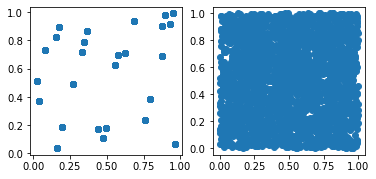

In [33]:
fig = plt.figure (figsize = (6,6))

ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)

ax1.scatter(Nsimple[Even],Nsimple[~Even])
ax2.scatter(Nrand48[Even],Nrand48[~Even])

 ## Calcular los momentos de la distribución

In [51]:
setname = 'drand48'
rand =  MyRandom( seed = 16 , method=setname)

moments = []

points = np.linspace(1, 1e6,11)


In [52]:
for k in tqdm(range(3)):
    
    test = []
    for i in range(len(points)):
        test.append(rand.TestMethod(int(points[i]),k+1 , 45, setname))
            
    moments.append(test)

100%|██████████| 3/3 [00:35<00:00, 11.68s/it]


In [53]:
print(moments[2])

[0.2499999344926368, 0.1573405764384592, 0.01647820690951629, 0.031205838223846854, 0.3406608717220334, 0.0957333230068927, 0.09677791106359854, 0.022417307469604898, 0.15697016922900411, 0.2085472547274906, 0.2035624754447296]


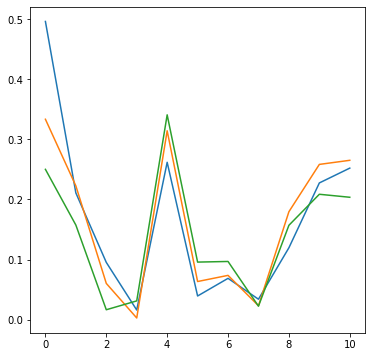

In [54]:
fig = plt.figure( figsize = (6,6))

for i in range(len(moments)):
    plt.plot(moments[i])

## Generación de eventos usando numpy

In [55]:
x = np.random.rand()
print(x)

0.9795599656993191


In [56]:
vec = np.random.rand(3)
print(vec)

[0.77450243 0.53995268 0.79632245]


In [57]:
matrix = np.random.rand(2,4)
print(matrix)

[[0.28203791 0.65998106 0.40563793 0.07256156]
 [0.96411189 0.71890535 0.37336937 0.27347526]]


In [58]:
a = []

for i in tqdm(range(10000)):
    a.append(np.random.uniform(-5,5))

100%|██████████| 10000/10000 [00:00<00:00, 131655.81it/s]


(array([0.10766159, 0.08765014, 0.09865643, 0.10345918, 0.0954546 ,
        0.10085769, 0.09205266, 0.10606067, 0.09905666, 0.09525449,
        0.10746147, 0.09665529, 0.10105781, 0.10205838, 0.10465987,
        0.09605495, 0.10686113, 0.09765586, 0.09865643, 0.10385941]),
 array([-4.99468923e+00, -4.49497524e+00, -3.99526126e+00, -3.49554727e+00,
        -2.99583329e+00, -2.49611930e+00, -1.99640532e+00, -1.49669133e+00,
        -9.96977348e-01, -4.97263363e-01,  2.45062123e-03,  5.02164606e-01,
         1.00187859e+00,  1.50159258e+00,  2.00130656e+00,  2.50102054e+00,
         3.00073453e+00,  3.50044851e+00,  4.00016250e+00,  4.49987648e+00,
         4.99959047e+00]),
 <BarContainer object of 20 artists>)

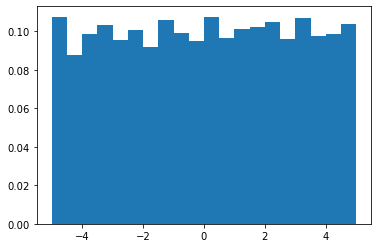

In [59]:
plt.hist( a , 20, density = True)

In [63]:
poisson = []
gauss = []
for i in tqdm(range(1000)):
    poisson = np.append(poisson , np.random.poisson())    
    gauss = np.append(gauss , np.random.standard_normal())

100%|██████████| 1000/1000 [00:00<00:00, 21289.26it/s]


(array([0.366, 0.371, 0.191, 0.054, 0.018]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

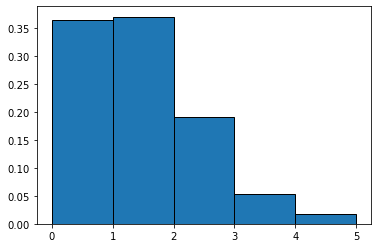

In [61]:
plt.hist( poisson, bins = 5 , density = True , edgecolor = 'black')

(array([0.00759752, 0.03190959, 0.12307983, 0.21425008, 0.34948594,
        0.38595404, 0.27351074, 0.09572876, 0.03039008, 0.00759752]),
 array([-3.28633273, -2.62822328, -1.97011384, -1.3120044 , -0.65389495,
         0.00421449,  0.66232393,  1.32043338,  1.97854282,  2.63665226,
         3.29476171]),
 <BarContainer object of 10 artists>)

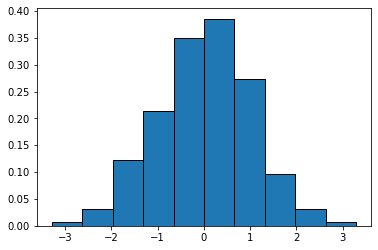

In [64]:
plt.hist( gauss, bins = 10 , density = True , edgecolor = 'black')